## **I.Title of Project : BANK CUSTOMER CHURN MODEL**

**OBJECTIVE** : The primary objective of this project is to develop a robust machine learning model to predict customer churn in the banking sector. Customer churn, the phenomenon where customers stop using a bank's services, is a significant challenge for financial institutions as retaining existing customers is more cost-effective than acquiring new ones. By accurately predicting which customers are likely to churn, banks can implement targeted retention strategies to minimize churn rates and enhance customer loyalty. The project leverages various machine learning techniques and methodologies, including data encoding, feature scaling, and handling imbalanced data and hyperparameter tuning to build an effective predictive model.

**1. Data Source**

In [ ]:
#YBI FOUNDATION GITHUB : https://github.com/YBIFoundation/Dataset/blob/main/Bank%20Churn%20Modelling.csv

**2.Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**3.Import Data**

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

**4. Describe Data**

In [ ]:
df.head(15)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.info() #before setting index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
#setting index
df=df.set_index('CustomerId')

In [ ]:
df.info() #after setting index

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isna().sum()

Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

**5. Data Visualization**

In [ ]:
#done in further steps

**6. Data Preprocessing**

In [ ]:
ENCODING (for categorical data)

In [ ]:
#categorical variable 1
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [ ]:
#categorical variable 2
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [ ]:
#categorical variable 3
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [ ]:
df.replace({'Num Of Products':{1:0, 2:1, 3:1, 4:1}},inplace=True)   #2,3,4 categories aare clubbed as 3,4 data is not enough seperately

In [ ]:
#categorical variable 4
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [ ]:
#categorical variable 5
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [ ]:
#feature engineering
#to find number of customers who have zero balance (more likely to churn)
df.loc[(df['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [ ]:
#feature engineering
#to find number of customers who have zero balance (more likely to churn)
df.loc[(df['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [ ]:
#to count churn of people based on geography
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  
Churn Geography                    
0     0                      2064  
      1                      1695  
      2                      4204  
1     0                       413  
      1                       814  
      2                       810

**7. Define Target Variable(y) and feature variable(x)**

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
X=df.drop(['Surname', 'Churn'], axis=1) ##surname has no predictive power

In [ ]:
y=df['Churn']

In [ ]:
X.shape, y.shape

((10000, 10), (10000,))

**HANDLING IMBALANCE DATA AND DATA VISUALIZATION**

In [ ]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

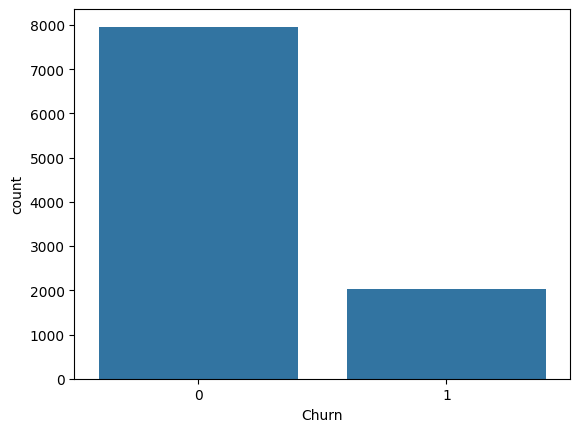

In [ ]:
sns.countplot(x='Churn', data=df);

In [ ]:
X.shape, y.shape

((10000, 10), (10000,))

**1.RANDOM UNDER SAMPLING**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus=RandomUnderSampler(random_state=2529)

In [ ]:
X_rus, y_rus = rus.fit_resample(X,y)

In [ ]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 10), (4074,), (10000, 10), (10000,))

In [ ]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

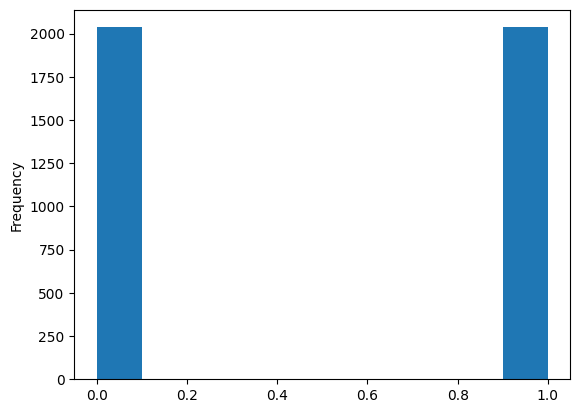

In [ ]:
#BY UNDERSAMPLING WE BALANCED THE DATA
y_rus.plot(kind='hist')

**2.RANDOM OVER SAMPLING**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=2529)

In [ ]:
X_ros, y_ros = ros.fit_resample(X,y)

In [ ]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 10), (15926,), (10000, 10), (10000,))

In [ ]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

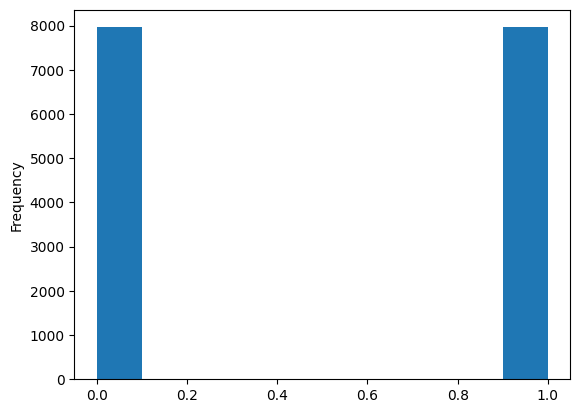

In [ ]:
#BY OVERSAMPLING WE BALANCED THE DATA
y_ros.plot(kind='hist')

**8.Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split Original Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

In [ ]:
# Split Random Under Sample data
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=2529)

In [ ]:
# Split Random Over Sample Data
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=2529)

**9. Modeling**

In [ ]:
#GETING DATA READY FOR MODELING BY PREPROCESSING

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
#Standardize Original Data
X_train[['CreditScore', 'Age', 'Tenure','Balance', 'Estimated Salary' ]]=sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure','Balance', 'Estimated Salary' ]])

In [ ]:
X_test[['CreditScore', 'Age', 'Tenure','Balance', 'Estimated Salary' ]]=sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure','Balance', 'Estimated Salary' ]])

In [ ]:
#Standardize Random Under Sample Data
X_train_rus[['CreditScore', 'Age', 'Tenure','Balance', 'Estimated Salary' ]]=sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure','Balance', 'Estimated Salary' ]])

In [ ]:
X_test_rus[['CreditScore', 'Age', 'Tenure','Balance', 'Estimated Salary' ]]=sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure','Balance', 'Estimated Salary' ]])

In [ ]:
#Standardize Random Over Sample Data
X_train_ros[['CreditScore', 'Age', 'Tenure','Balance', 'Estimated Salary' ]]=sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure','Balance', 'Estimated Salary' ]])

In [ ]:
X_test_ros[['CreditScore', 'Age', 'Tenure','Balance', 'Estimated Salary' ]]=sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure','Balance', 'Estimated Salary' ]])

In [ ]:
#MODELING USING SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:
from sklearn.svm import SVC

In [ ]:
#original data
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
#random under sample data
svc_rus = SVC()
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [ ]:
#random over sample data
svc_ros = SVC()
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

**10. Prediction**

In [ ]:
#ORGINAL DATA
y_pred = svc.predict(X_test)

In [ ]:
#RANDOM UNDER SAMPLE DATA
y_pred_rus = svc_rus.predict(X_test_rus)

In [ ]:
#RANDOM OVER SAMPLE DATA
y_pred_ros = svc_ros.predict(X_test_ros)

**11. Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

**ON ORIGINAL DATA**

In [ ]:
#original data
confusion_matrix(y_test, y_pred)

array([[2382,   32],
       [ 436,  150]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



**Hyperparameter Tuning**(to increase the recall 1(Customers who are leaving))

In [ ]:
#hyperparameter tuning for original dataset
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
confusion_matrix(y_test, grid_predictions)

array([[2154,  260],
       [ 340,  246]])

In [ ]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.42      0.45       586

    accuracy                           0.80      3000
   macro avg       0.67      0.66      0.66      3000
weighted avg       0.79      0.80      0.79      3000



**ON RANDOM UNDER SAMPLE DATA**

In [ ]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[472, 155],
       [175, 421]])

In [ ]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



**hyperparameter tuning**

In [ ]:
#hyperparameter tuning for under sample dataset

In [ ]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [ ]:
grid_rus = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 2)
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [ ]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [ ]:
confusion_matrix(y_test_rus, grid_predictions_rus)

array([[478, 149],
       [183, 413]])

In [ ]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       627
           1       0.73      0.69      0.71       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



**ON RANDOM OVER SAMPLE DATA**

In [ ]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1825,  554],
       [ 637, 1762]])

In [ ]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      2379
           1       0.76      0.73      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



**Hyperparameter Tuning**

In [ ]:
#hyperparameter tuning for over sample dataset

In [ ]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [ ]:
grid_ros = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 2)
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  10.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [ ]:
confusion_matrix(y_test_ros, grid_predictions_ros)

array([[2044,  335],
       [  68, 2331]])

In [ ]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.87      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



**EXPLANATION :**The Bank Customer Churn Model project successfully demonstrated the application of machine learning techniques to predict customer churn in the banking sector. By employing a comprehensive approach that involved data preprocessing, feature encoding, handling imbalanced data, and hyperparameter tuning, the project developed a robust predictive model.

The models, including Logistic Regression and Support Vector Classifier (SVC), were evaluated using various metrics such as the confusion matrix and classification report. These evaluations provided valuable insights into the models' performance and their ability to accurately predict customer churn. Hyperparameter tuning further optimized the models, enhancing their predictive accuracy.

The project also addressed the challenge of imbalanced data by implementing Random Under Sampling (RUS) and Random Over Sampling (ROS) techniques, ensuring the models' reliability and robustness. Notably, the model using oversampling achieved an impressive accuracy of 92% and a churn recall (1) of 97%, indicating its effectiveness in correctly identifying customers who are likely to churn.
In conclusion, this project illustrates the potential of machine learning in helping banks identify customers at risk of churning. By leveraging these predictive models, banks can implement targeted retention strategies to minimize churn rates, retain valuable customers, and ultimately improve customer loyalty and business growth.